In [1]:
from m5p import PolyTree
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Cleaning and Formatting data

In [2]:
data = pd.read_table('airfoil_self_noise.dat',names=["frequency","aoa","chord","vinf","delta","noise"])
features = ['frequency','aoa','chord','vinf','delta']
target   = 'noise'
Xorig = data[features]
y = data[target]
nu = 1.568e-5 
X = Xorig.copy()
X['Re'] = X['chord']*X['vinf']/nu
X=X.drop(columns=['chord','vinf'])
#X['aoa'] = np.abs(X['aoa'])
features = X.keys()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,random_state=42)
scaler = MinMaxScaler().fit(X_train)

X_train_temp = scaler.transform(X_train)
X_test_temp  = scaler.transform(X_test)

y_train = y_train.to_numpy().reshape((y_train.shape[0],1))
y_test = y_test.to_numpy().reshape((y_test.shape[0],1))

# Plot of how performance of how PolyTree performance varies with order and min_samples_leaf

NameError: name 'np' is not defined

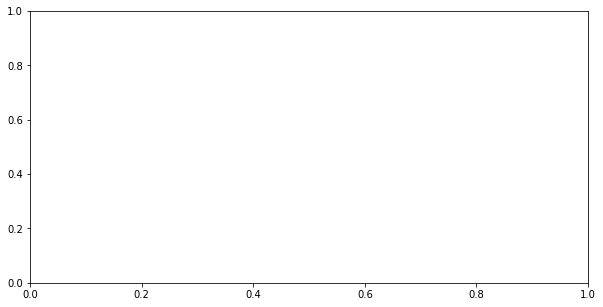

In [3]:
X_plot, y_plot = [[],[],[]], [[],[],[]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for order in [1,2,3]:
    for min_samples_leaf in range(30,200,10):
        tree = PolyTree(min_samples_leaf=min_samples_leaf, basis="total-order", max_depth=9999999, order=order)
        tree.fit(X_train_temp, y_train)
        y_plot[order-1].append(mean_absolute_error(y_train, tree.predict(X_train_temp)))
        X_plot[order-1].append(min_samples_leaf)
    plt.plot(X_plot[order-1],y_plot[order-1], label="order = " + str(order))

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Test MAE')
ax.legend(loc='best')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_table('airfoil_self_noise.dat',names=["frequency","aoa","chord","vinf","delta","noise"])
features = ['frequency','aoa','chord','vinf','delta']
target   = 'noise'
Xorig = data[features]
y = data[target]
nu = 1.568e-5 
X = Xorig.copy()
X['Re'] = X['chord']*X['vinf']/nu
X=X.drop(columns=['chord','vinf'])
#X['aoa'] = np.abs(X['aoa'])
features = X.keys()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,random_state=42)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train_temp = scaler.transform(X_train)
X_test_temp  = scaler.transform(X_test)

y_train = y_train.to_numpy().reshape((y_train.shape[0],1))
y_test = y_test.to_numpy().reshape((y_test.shape[0],1))

from sklearn.metrics import mean_absolute_error

X_test_plot, y_test_plot = [[],[],[]], [[],[],[]]
X_train_plot, y_train_plot = [[],[],[]], [[],[],[]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for order in [1,2,3]:
    for min_samples_leaf in range(30,200,10):
        tree = PolyTree(min_samples_leaf=min_samples_leaf, max_depth=9999999, order=order)
        tree.fit(X_train_temp, y_train)
        y_test_plot[order-1].append(mean_absolute_error(y_test, tree.predict(X_test_temp)))
        X_test_plot[order-1].append(min_samples_leaf)
        y_train_plot[order-1].append(mean_absolute_error(y_train, tree.predict(X_train_temp)))
        X_train_plot[order-1].append(min_samples_leaf)
    plt.plot(X_test_plot[order-1],y_test_plot[order-1], label="test order = " + str(order))
    plt.plot(X_train_plot[order-1],y_train_plot[order-1], label="train order = " + str(order))


ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Test MAE')
ax.legend(loc='best')
plt.show()

In [ ]:
tree = PolyTree(min_samples_leaf=75, max_depth=9999999, order=3)
tree.fit(X_train_temp, y_train)

y_pred_train = tree.predict(X_train_temp)
y_pred_test  = tree.predict(X_test_temp)

fig, ax = plt.subplots()
ax.plot(y_train,y_pred_train,'C0o',ms=8,mec='k',label='Train')
ax.plot(y_test, y_pred_test ,'C3o',ms=8,mec='k',label='Test',alpha=0.5)
#ax.plot('k--')
ax.set_xlabel('True SPL (dB)')
ax.set_ylabel('Predicted SPL (dB)')
ax.set_xlim([100,140])
#ax.set_aspect(1)
ax.legend()
plt.show()